In [1]:
# packages

# standard
import numpy as np
import pandas as pd

# plots
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# import rotation package
from scipy.spatial.transform import Rotation as R

# configs
pd.set_option('display.max_columns', None) # we want to display all columns in this notebook
pd.set_option('display.max_colwidth', None) # columns can be as wide as necessary to show full content

# aesthetics
default_color_1 = 'darkblue'
default_color_2 = 'darkgreen'
default_color_3 = 'darkred'

In [2]:
# load training data table
df_train = pd.read_csv('../input/image-matching-challenge-2024/train/train_labels.csv')
df_train.head()

,image_name,rotation_matrix,translation_vector,calibration_matrix,dataset,scene
0,00.png,0.999017467386748;-0.01951432487219089;0.03979058910031915;0.03580410529229767;-0.17374693099514127;-0.9841392533650855;0.026118305848310826;0.9845969708944632;-0.17287752602655398,-0.011700149127917355;0.018812528601332625;0.39292089450723033,5809.066058292364;0.0;2496.9582994472266;0.0;5809.066058292364;1722.4949763575241;0.0;0.0;1.0,transp_obj_glass_cup,transp_obj_glass_cup
1,01.png,0.999147719991382;-0.021624129414769648;0.035160072000451896;0.03507100839198339;-0.004484366109474225;-0.9993747619541763;0.021768279821637208;0.9997561140036355;-0.003722164149712992,-0.011610785964818585;0.016710808069866724;0.3904348025368086,5809.066058292364;0.0;2496.9582994472266;0.0;5809.066058292364;1722.4949763575241;0.0;0.0;1.0,transp_obj_glass_cup,transp_obj_glass_cup
2,02.png,0.9992527616183833;-0.02402019259931326;0.030281161561702366;0.03401506827119704;0.17446571991611926;-0.9840755497951647;0.018354659586596225;0.9843702265517997;0.1751524009250745,-0.011589797430545654;0.014113680489915202;0.3883381399691822,5809.066058292364;0.0;2496.9582994472266;0.0;5809.066058292364;1722.4949763575241;0.0;0.0;1.0,transp_obj_glass_cup,transp_obj_glass_cup
3,03.png,0.9993946226667176;-0.02356062921667625;0.025598533859643915;0.03207163399533079;0.3387496556434208;-0.9403297725236256;0.013483266581899838;0.9405815050022929;0.339300212157174,-0.011471598819000773;0.011325953000912126;0.38663455605386887,5809.066058292364;0.0;2496.9582994472266;0.0;5809.066058292364;1722.4949763575241;0.0;0.0;1.0,transp_obj_glass_cup,transp_obj_glass_cup
4,04.png,0.9995276708105233;-0.02256816267742356;0.020859370015773024;0.029327975512817118;0.49769391270506835;-0.8668567581259542;0.009181782855697686;0.8670590794690317;0.4981207158650458,-0.011389007765655301;0.008237801582322509;0.38546171231233306,5809.066058292364;0.0;2496.9582994472266;0.0;5809.066058292364;1722.4949763575241;0.0;0.0;1.0,transp_obj_glass_cup,transp_obj_glass_cup


In [3]:
# image names are NOT unique
df_train.image_name.value_counts()

image_name
00047.png    3
00069.png    3
00070.png    3
00071.png    3
00072.png    3
            ..
24.png       1
26.png       1
27.png       1
28.png       1
29.png       1
Name: count, Length: 1338, dtype: int64

In [4]:
# example:
df_train[df_train.image_name=='00011.png']

,image_name,rotation_matrix,translation_vector,calibration_matrix,dataset,scene
510,00011.png,0.818333800438463;-0.2976050506491451;0.49169200205826163;0.10828787539620295;0.9200135666820614;0.37662816299784163;-0.5644497560475319;-0.25496327372598604;0.7851052171198519,-0.8737248891553905;-0.4725279502538612;1.5586160150928106,714.5348544605648;0.0;384.0;0.0;714.5348544605648;512.0;0.0;0.0;1.0,lizard,lizard
1547,00011.png,-0.7663419257866364;-0.509538652867604;0.39126770121682314;0.362500200664674;0.15985444436032548;0.9181721849066891;-0.5303900991720161;0.8454684605898195;0.06220470117426924,4.946315353455534;-16.135895107247393;18.500788691660265,874.6108125755727;0.0;288.0;0.0;874.6108125755727;512.0;0.0;0.0;1.0,pond,pond
2070,00011.png,-0.422747076932537;-0.338330246781646;-0.8407244215898969;0.33843022666396516;0.8016446836177851;-0.492778634792052;0.8406841800730959;-0.4928472839937458;-0.22439176463233945,27.773105439252546;21.02019717121849;67.09744874947172,2209.8841784185324;0.0;384.0;0.0;2209.8841784185324;512.0;0.0;0.0;1.0,church,church


In [5]:
# crosstab of dataset and scene
pd.crosstab(df_train.dataset, df_train.scene)

scene,church,dioscuri,lizard,multi-temporal-temple-baalshamin,pond,transp_obj_glass_cup,transp_obj_glass_cylinder
dataset,,,,,,,
church,110,0,0,0,0,0,0
dioscuri,0,70,0,0,0,0,0
lizard,0,0,711,0,0,0,0
multi-temporal-temple-baalshamin,0,0,0,68,0,0,0
pond,0,0,0,0,1117,0,0
transp_obj_glass_cup,0,0,0,0,0,36,0
transp_obj_glass_cylinder,0,0,0,0,0,0,36


In [6]:
# convert input string to matrix
def get_rotation_matrix_from_string(i_matrix_string):
    # replace semicolon by comma
    my_string = i_matrix_string.replace(';',',')
    # split to list
    my_list = my_string.split(',')
    # convert each element from string to double
    my_list = [float(s) for s in my_list]
    # convert list to array
    my_array = np.array(my_list)
    # convert array to 3x3-matrix
    rot_matrix = np.asmatrix(my_array.reshape(3,3))
    return rot_matrix

In [7]:
# convert input string to vector
def get_translation_from_string(i_vector_string):
    # replace semicolon by comma
    my_string = i_vector_string.replace(';',',')
    # split to list
    my_list = my_string.split(',')
    # convert each element from string to double
    my_list = [float(s) for s in my_list]
    # convert list to array
    my_array = np.array(my_list)
    return my_array

In [8]:
# convert matrix (in string representation) to rotation vector
def get_rotation_vector(i_matrix_string): 
    mat = get_rotation_matrix_from_string(i_matrix_string)
    rot = R.from_matrix(mat)
    vec = rot.as_rotvec()
    return vec

In [9]:
# convert matrix (in string representation) to Euler angles
def get_rotation_angles(i_matrix_string): 
    mat = get_rotation_matrix_from_string(i_matrix_string)
    rot = R.from_matrix(mat)
    vec = rot.as_euler('zyx', degrees=True)
    return vec

In [10]:
# convert matrix (in string representation) to quaternion
def get_rotation_quaternion(i_matrix_string): 
    mat = get_rotation_matrix_from_string(i_matrix_string)
    rot = R.from_matrix(mat)
    vec = rot.as_quat()
    return vec

In [11]:
# example

# matrix
my_index = 7
my_example_mat = df_train.rotation_matrix[my_index]
print('Rotation matrix:')
print(get_rotation_matrix_from_string(my_example_mat))
print()
print('Converted to rotation vector:')
print(get_rotation_vector(my_example_mat))
print()
print('Converted to Euler angles:')
print(get_rotation_angles(my_example_mat))
print()
print('Converted to quaternion:')
print(get_rotation_quaternion(my_example_mat))

# translation vector
my_example_trans = df_train.translation_vector[my_index]
print()
print('Translation vector:')
print(get_translation_from_string(my_example_trans))

Rotation matrix:
[[ 9.99852825e-01 -1.47506145e-02  8.76062629e-03]
 [ 1.71538633e-02  8.67663593e-01 -4.96855747e-01]
 [-2.72348910e-04  4.96932901e-01  8.67788925e-01]]

Converted to rotation vector:
[0.52004561 0.00472692 0.01669549]

Converted to Euler angles:
[ 0.84521104  0.50195333 29.79345392]

Converted to quaternion:
[0.25709935 0.00233689 0.00825389 0.9663469 ]

Translation vector:
[-0.0112979  -0.00155502  0.38556162]


In [12]:
# component projection functions
def get_rotation_vector_x(i_matrix_string):
    vec = get_rotation_vector(i_matrix_string)
    return vec[0]

def get_rotation_vector_y(i_matrix_string):
    vec = get_rotation_vector(i_matrix_string)
    return vec[1]

def get_rotation_vector_z(i_matrix_string):
    vec = get_rotation_vector(i_matrix_string)
    return vec[2]

def get_rotation_angle_1(i_matrix_string):
    vec = get_rotation_angles(i_matrix_string)
    return vec[0]

def get_rotation_angle_2(i_matrix_string):
    vec = get_rotation_angles(i_matrix_string)
    return vec[1]

def get_rotation_angle_3(i_matrix_string):
    vec = get_rotation_angles(i_matrix_string)
    return vec[2]

def get_translation_x(i_vector_string):
    vec = get_translation_from_string(i_vector_string)
    return vec[0]

def get_translation_y(i_vector_string):
    vec = get_translation_from_string(i_vector_string)
    return vec[1]

def get_translation_z(i_vector_string):
    vec = get_translation_from_string(i_vector_string)
    return vec[2]

In [13]:
# add rotation vector components and norm to data frame
df_train['rot_x'] = df_train.rotation_matrix.apply(get_rotation_vector_x)
df_train['rot_y'] = df_train.rotation_matrix.apply(get_rotation_vector_y)
df_train['rot_z'] = df_train.rotation_matrix.apply(get_rotation_vector_z)
df_train['rot_norm'] = np.sqrt(df_train.rot_x**2 + df_train.rot_y**2 + df_train.rot_z**2)

# add Euler angles (in degrees)
df_train['angle_1'] = df_train.rotation_matrix.apply(get_rotation_angle_1)
df_train['angle_2'] = df_train.rotation_matrix.apply(get_rotation_angle_2)
df_train['angle_3'] = df_train.rotation_matrix.apply(get_rotation_angle_3)

# add translation vector components
df_train['trans_x'] = df_train.translation_vector.apply(get_translation_x)
df_train['trans_y'] = df_train.translation_vector.apply(get_translation_y)
df_train['trans_z'] = df_train.translation_vector.apply(get_translation_z)

In [14]:
# statistics
features = ['rot_x','rot_y','rot_z','rot_norm',
            'angle_1', 'angle_2', 'angle_3',
            'trans_x', 'trans_y', 'trans_z']

df_train[features].describe()

,rot_x,rot_y,rot_z,rot_norm,angle_1,angle_2,angle_3,trans_x,trans_y,trans_z
count,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000
mean,-0.088564,-0.029407,-0.080420,1.190887,-2.651116,-3.376682,-28.701298,0.051055,-1.046501,8.304462
std,0.475404,1.139374,0.727267,0.805859,78.104593,34.276964,54.151196,8.623394,5.731335,14.892743
min,-3.134208,-2.919248,-2.406536,0.001312,-179.956855,-81.651953,-179.633636,-51.743304,-16.135895,-14.845317
25%,-0.282647,-0.779252,-0.576200,0.543463,-44.191700,-32.939290,-56.422178,-3.011322,-3.066766,0.411153
50%,-0.094922,-0.009170,-0.048458,0.991172,-2.361607,0.143364,-22.984761,-0.368158,-1.213609,3.458859
75%,0.086431,0.565054,0.263071,1.718790,18.611150,22.838888,-0.633212,1.869332,-0.156335,9.434419
max,2.968890,2.996097,2.347388,3.139617,179.930057,83.240762,179.896223,46.017260,42.009276,156.754812


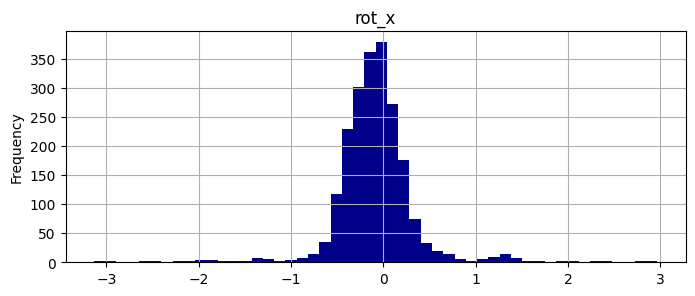

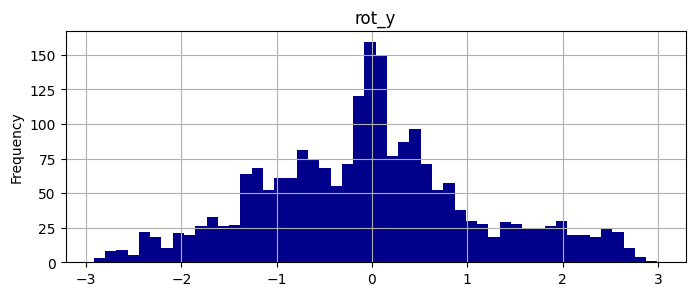

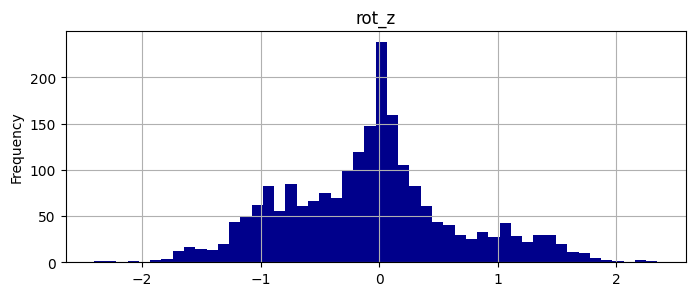

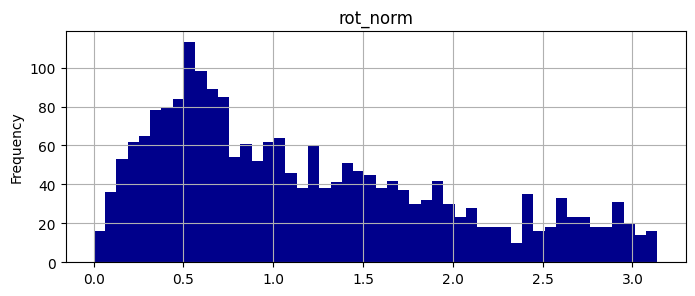

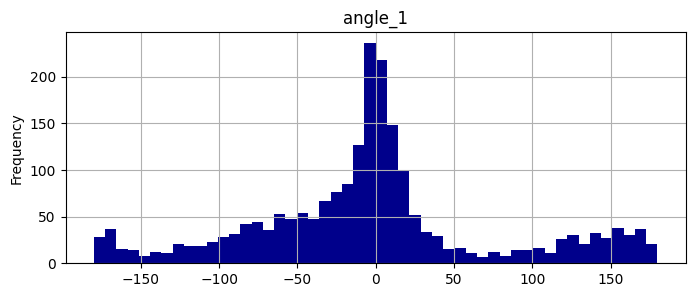

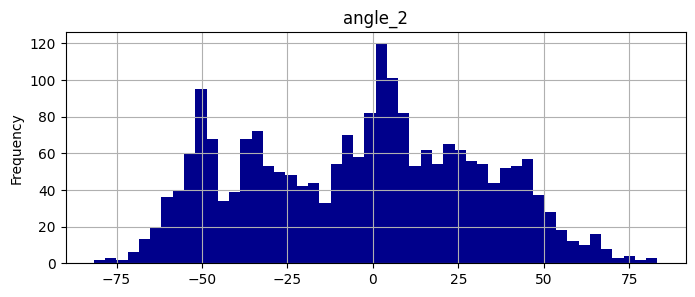

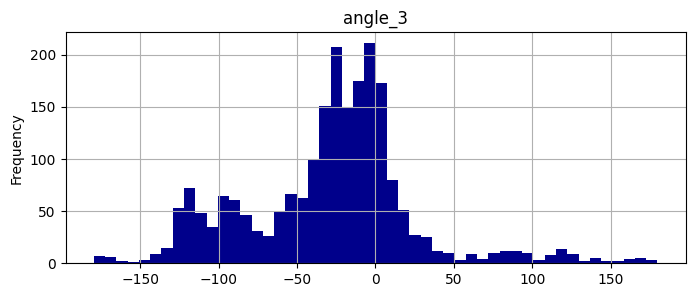

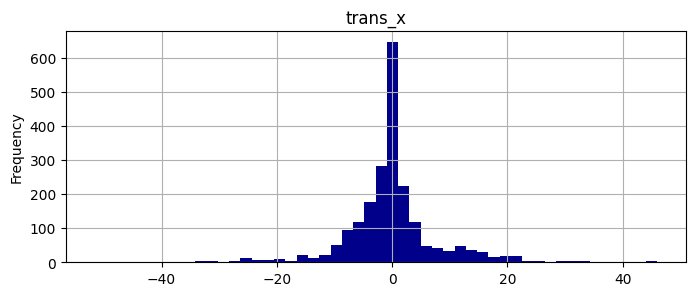

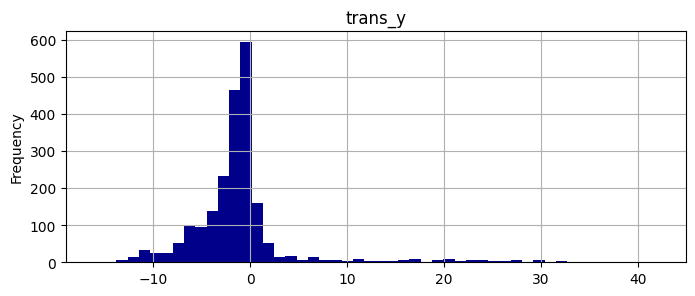

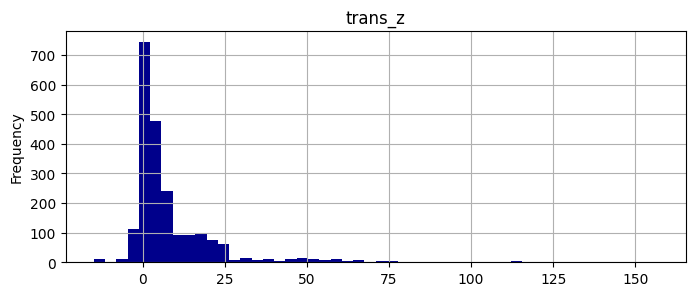

In [15]:
# distributions
for f in features:
    plt.figure(figsize=(8,3))
    df_train[f].plot(kind='hist', bins=50, color=default_color_1)
    plt.title(f)
    plt.grid()
    plt.show()

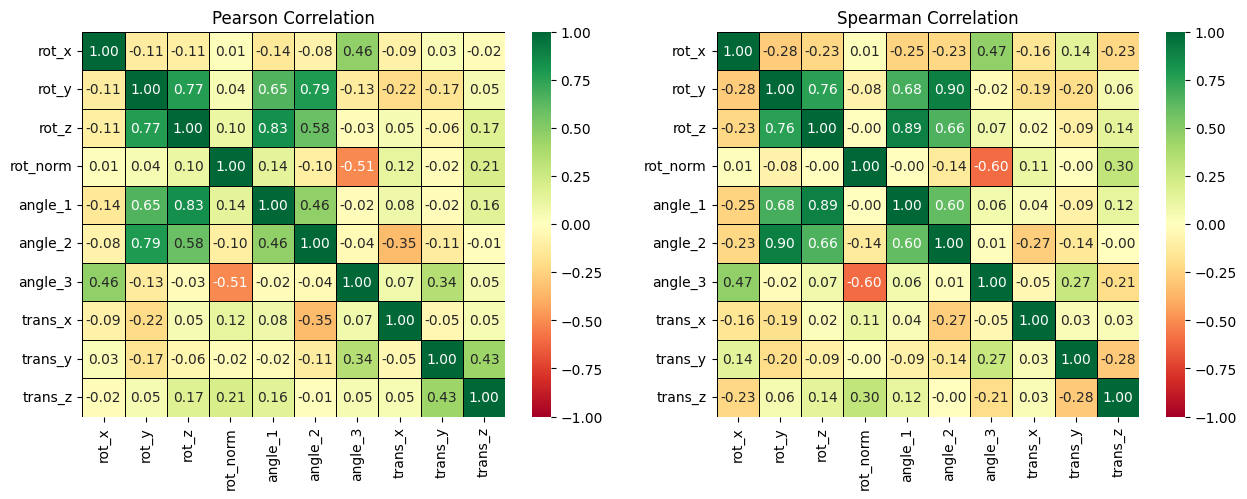

In [16]:
corr_pearson = df_train[features].corr(method='pearson')
corr_spearman = df_train[features].corr(method='spearman')

plt.figure(figsize=(15,5))
ax1 = plt.subplot(1,2,1)
sns.heatmap(corr_pearson, annot=True, cmap='RdYlGn', vmin=-1, vmax=+1,
            fmt='.2f', linecolor='black', linewidths=0.5)
plt.title('Pearson Correlation')

ax2 = plt.subplot(1,2,2, sharex=ax1)
sns.heatmap(corr_spearman, annot=True, cmap='RdYlGn', vmin=-1, vmax=+1,
            fmt='.2f', linecolor='black', linewidths=0.5)
plt.title('Spearman Correlation')
plt.show()

In [17]:
# mean of features by dataset
feature_means = df_train.groupby(by='dataset')[features].mean()
feature_means

,rot_x,rot_y,rot_z,rot_norm,angle_1,angle_2,angle_3,trans_x,trans_y,trans_z
dataset,,,,,,,,,,
church,-0.032753,-0.539008,0.264328,1.175443,43.616345,-17.640146,44.509043,-1.140780,18.070278,42.221482
dioscuri,-0.052256,0.249614,-0.110214,1.846043,-43.205346,7.657929,15.924314,-0.861351,0.484035,25.254988
lizard,0.041079,-0.066393,-0.067656,0.957057,-7.643950,-1.256632,-21.349746,-0.340556,-0.759295,1.817840
multi-temporal-temple-baalshamin,-0.034358,-0.360565,0.028130,0.725331,10.165376,-17.279306,7.843459,2.843357,0.839243,27.827699
pond,-0.182589,0.045172,-0.132156,1.304270,-2.338655,-3.583536,-47.162530,0.309748,-3.390194,7.350870
transp_obj_glass_cup,-0.085047,0.001143,-0.002027,1.571193,-0.302213,1.702988,-4.869847,-0.011854,0.003737,0.403710
transp_obj_glass_cylinder,-0.078647,-0.003433,-0.006191,1.563374,-2.812792,4.477999,-4.414168,-0.036892,0.000162,0.431963


In [18]:
# interactive 3d plot of rotation vectors
fig = px.scatter_3d(df_train, 
                    x='rot_x', y='rot_y', z='rot_z',
                    color='dataset',
                    hover_data=['image_name'],
                    opacity=0.5)
fig.update_traces(marker_size = 4)
fig.update_layout(title='Rotation Vectors')
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


In [19]:
# interactive 3d plot of Euler angles
fig = px.scatter_3d(df_train, 
                    x='angle_1', y='angle_2', z='angle_3',
                    color='dataset',
                    hover_data=['image_name'],
                    opacity=0.5)
fig.update_traces(marker_size = 4)
fig.update_layout(title='Euler angles')
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [20]:
# interactive 3d plot of translation vectors
fig = px.scatter_3d(df_train, 
                    x='trans_x', y='trans_y', z='trans_z',
                    color='dataset',
                    hover_data=['image_name'],
                    opacity=0.5)
fig.update_traces(marker_size = 4)
fig.update_layout(title='Translation vectors')
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

